# Yelp Project Business Analysis

![indian banner](./images/indian_banner.jpg)

## Overview

This project analyzes the [Yelp open source data set] (https://www.yelp.com/developers/documentation/v3) to properly educate and propose a new business idea to an investor. Using data analysis and within our below presentation and findings, we believe opening a high-end Indian Restaurant in the Washington D.C. and Los Angeles, CA markets would be safe, stable and carries with it less risk. 


## Business Problem

An investor has approached us and wanted us to come up with a business idea which uses data analysis primarily against the Yelp open source data set. They requested we come up with either a potential business in two potential markets or two potential businesses in a potential market. 

We determined that we will use data analysis on the Yelp data set to solve the problem. Our overlying assumptions made are that the sample set sizes have to be large enough (>100 businesses) for data analysis to be effective against the sample population, and that the the implementation, quality and service of our proposed business idea be "as much, if not better than" existing businesses with the same profile. 

## Data Understanding

![img](./images/yelp_data.png)

By passing to the Yelp platform a category and location (within 25 miles), Yelp returns data which includes information on a business's name, location, category, price level (1-4), rating (0-5) and number of reviews. The service also provides reviews per business, including the text and the time it was created. 

We were able to extract and navigate the data which Yelp offers via their Application Program Interface (API) and our internal Python scripting/coding. 

Limitations include Yelp only returning a maximum of 1,000 businesses per criteria and only providing three sample reviews per business. 

## Data Analysis Walkthrough

We identified Indian Restaurants as our business idea.

After running our data extraction technology on the Yelp data set, we created CSV files which contain the data on the Indian restaurant businesses by market, and the data on sample business reviews per business. 

For purposes of this walkthrough, we will use (and load) the Washington D.C. dataset, as that is also one of our chosen markets for our business idea. 

To review the code which creates the data files, please look at the helper_funcs notebook which is kicked off via 2 main functions:
- generate_all_yelp_data(): Primary function driver to make API call to retrieve all results of inputted parameters, parse results and store as data csv file
- generate_yelp_data(): Testing function driver to make ONE(1) main API call to retrieve subset of only 50 results. This function is used for testing purposes of the code base. 

In [1]:
import json
import sys
import pandas as pd
import numpy as np
import requests as rq
from matplotlib import pyplot as plt
from keys import client_id, api_key
from yelp_helper_func import *

In [2]:
indian_dc = pd.read_csv('C:\\Users\\User\\Documents\\Flatiron\\Repository\\flatiron-phase1-yelp\\data\\indian_dc.csv', converters={'categories': eval}, header=None,
                        names=['business_id', 'name', 'categories', 'num_categories', 'price', 'review_count', 'rating', 'street_address', 'city', 'state'])
dc_reviews = pd.read_csv('C:\\Users\\User\\Documents\\Flatiron\\Repository\\flatiron-phase1-yelp\\data\\reviews_dc.csv',
                        names=['business_id', 'review_id', 'text', 'rating', 'time_created'], index_col=0)
indian_la = pd.read_csv('C:\\Users\\User\\Documents\\Flatiron\\Repository\\flatiron-phase1-yelp\\data\\indian_la.csv', converters={'categories': eval}, header=None,
                        names=['business_id', 'name', 'categories', 'num_categories', 'price', 'review_count', 'rating', 'street_address', 'city', 'state'])
indian_ny = pd.read_csv('C:\\Users\\User\\Documents\\Flatiron\\Repository\\flatiron-phase1-yelp\\data\\indian_ny.csv', converters={'categories': eval}, header=None,
                        names=['business_id', 'name', 'categories', 'num_categories', 'price', 'review_count', 'rating', 'street_address', 'city', 'state'])
indian_chi = pd.read_csv('C:\\Users\\User\\Documents\\Flatiron\\Repository\\flatiron-phase1-yelp\\data\\indian_chi.csv', converters={'categories': eval}, header=None,
                        names=['business_id', 'name', 'categories', 'num_categories', 'price', 'review_count', 'rating', 'street_address', 'city', 'state'])
indian_mia = pd.read_csv('C:\\Users\\User\\Documents\\Flatiron\\Repository\\flatiron-phase1-yelp\\data\\indian_mia.csv', converters={'categories': eval}, header=None,
                        names=['business_id', 'name', 'categories', 'num_categories', 'price', 'review_count', 'rating', 'street_address', 'city', 'state'])
indian_sj = pd.read_csv('C:\\Users\\User\\Documents\\Flatiron\\Repository\\flatiron-phase1-yelp\\data\\indian_sj.csv', converters={'categories': eval}, header=None,
                        names=['business_id', 'name', 'categories', 'num_categories', 'price', 'review_count', 'rating', 'street_address', 'city', 'state'])
all_results = pd.read_csv('C:\\Users\\User\\Documents\\Flatiron\\Repository\\flatiron-phase1-yelp\\data\\final_indian_data.csv', converters={'categories': eval}, header=None,
                        names=['business_id', 'name', 'categories', 'num_categories', 'price', 'review_count', 'rating', 'street_address', 'city', 'state'])
all_reviews = pd.read_csv('C:\\Users\\User\\Documents\\Flatiron\\Repository\\flatiron-phase1-yelp\\data\\final_indian_review.csv',
                        names=['business_id', 'review_id', 'text', 'rating', 'time_created'], index_col=0)

### Washington D.C. Indian Restaurants - Business and Reviews Data

The D.C. datasets include business records for Indian Restaurants within 25 mile radius of Washington, D.C and the sample Reviews data (3 per) for each business.

In [3]:
indian_dc.head(3)

,business_id,name,categories,num_categories,price,review_count,rating,street_address,city,state
0,n-6O6I7pmmpwkW2pCO-zDw,Indigo,[indpak],1,2,876,4.5,243 K St NE,"Washington, DC",DC
1,jj1vSlzf-G1_vTJJ6ftsAA,Pappe,[indpak],1,2,304,4.0,1317 14th St NW,"Washington, DC",DC
2,CwdlygqT4cWwOtQGsYdoBw,Rasika,[indpak],1,3,3126,4.5,633 D St NW,"Washington, DC",DC


In [4]:
dc_reviews.head(3)

,business_id,review_id,text,rating,time_created
0,n-6O6I7pmmpwkW2pCO-zDw,RJ9WlG7xvv8Yki9QUx1hgQ,My tip for staying sane during the quarantine?...,5,2020-04-14 09:10:48
1,n-6O6I7pmmpwkW2pCO-zDw,-mKGFkpFQ7fRGcDIdK3pVA,I remember when Indigo first opened as a stand...,5,2020-03-29 07:36:03
2,n-6O6I7pmmpwkW2pCO-zDw,ZwPkQ1pTYvmtrebgPZXa6Q,Indigo offered awesome comfort food during thi...,5,2020-03-22 19:31:49


### Part 4: Questions and Answers Regarding Washington D.C. Dataset

Inputting in the Data of business information and Data of business reviews to the python function will output descriptive results of the data. 

In [5]:
part_4_questions_answers(all_results, all_reviews)

1. Top 5 Most reviewed businesses are:
                     name  review_count
1                  Rasika          3127
13  Amsterdam Falafelshop          1912
2            Kabob Palace          1897
22            Pi Pizzeria          1712
20      True Food Kitchen          1439

2. Number of businesses with highest rating of 5.0: 22

3 & 4. Percent of businesses by Rating: rating
1.0     0.518135
1.5     0.259067
2.0     1.554404
2.5     1.554404
3.0     9.326425
3.5    26.165803
4.0    32.383420
4.5    22.538860
5.0     5.699482
Name: business_id, dtype: float64

5. Percent of businesses by Price: price
0    20.725389
1    16.580311
2    60.880829
3     1.554404
4     0.259067
Name: business_id, dtype: float64

6. Sample reviews of most reviewed business:
3    With 3,000+ reviews already, I don't think I c...
4    I am in DC on Jan 5th for business and staying...
5    My second time at Rasika and it was just as en...
Name: text, dtype: object

7. Latest review of highest rated, highes

## Data Analysis

### Bottoms-Up Approach

Due to the breadth of data and the openness of the potential solution, we implemented a bottoms-up approach in our analysis. We started with the entire potential data set and narrowed our results to individual solutions.  

We first decided to narrow down our search by identifying the top three categories which utilize the Yelp service, from both a business advertising perspective (advertising revenue) and consumer usage perspective. Our assumption on consumer usage is that the more reviews a business category has, the more the consumers use the service. The top three categories identified were Home & Health Services, Restaurants/Dining and Professional Services. Our sample categories we explored were "HVAC Operator", "Indian Restaurant" and "Estate/Divorce Legal Services". Only Restaurants had, by far, the largest significant sample size, as well as the only category with a meaningful Price category. This was critical to properly account for multiple variables when performing data analysis. Within the restaurants category, we identified Indian Restaurants as our business idea due to our interests and expertise. Due to our assumption that high-end restaurants offer the most profitability, we identified high-end Indian Restaurants as one with less risk. We define high-end as a business having a "price level" of 3+. 

### Narrowing Down Markets

Next, we identified six target urban markets where we would potentially locate the business: Brooklyn, Miami, San Jose, Chicago, Washington D.C and Los Angeles. We then used data analysis to narrow down our search to the Top 3 markets with the highest average "Price Level". In this case, we defined average as the mean value and our belief is that it is an accurate determination of the concentration of high-quality restaurants available in the market. Our assumption with this is that there is less risk associated with opening a business where there is already a high demand for, and high-success rate of the existing business category.

We captured the relevant "Indian restaurant" business information data for each market and, using data analysis and creating bar charts, we are able to identify the Top 3 markets by average "price level". 

Based on the charts below, we have identified that San Jose (3.9), Washington D.C. and Los Angeles all have a higher-concentration of high-end restaurants, respective to the other markets. 

Our analysis is based on the fact that the average "price level" of restaurants in these markets are respectively higher than the total subset of markets.

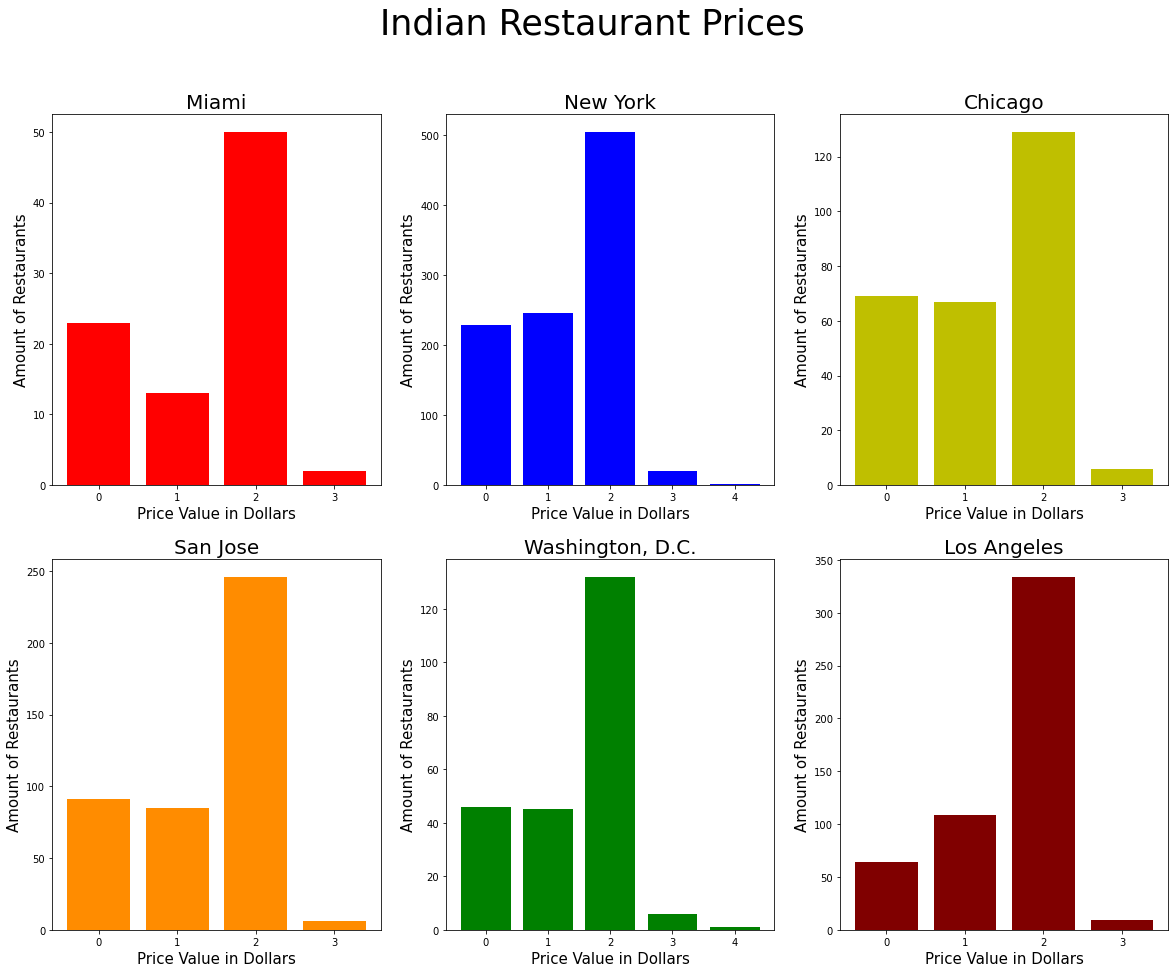

In [6]:
indian_rest_price(indian_mia, indian_ny, indian_sj, indian_chi, indian_dc, indian_la)

### Baseline Calculations

We then wanted to use data analyis to determine which remaining markets already have an appreciate consumer base of demand which would support a new entrant in the market with business. In order to make comparisons, we first had to create "averages" of "Per Business Review Count" and "Per Business Rating" for the existing sample population of all Indian restaurants in the area with which to compare to - we call this our Baseline. 

We define our "averages" as the following:
- For "Review Count" - We used the Median value of all business review counts. We believe this is the proper data analysis to use as this method accounts for outliers in the data, which can make the data skewed otherwise.
- For "Rating" - We used the Mean value of all the business ratings. We use this method as it would properly capture the "average" rating of an Indian Restaurant in the area.

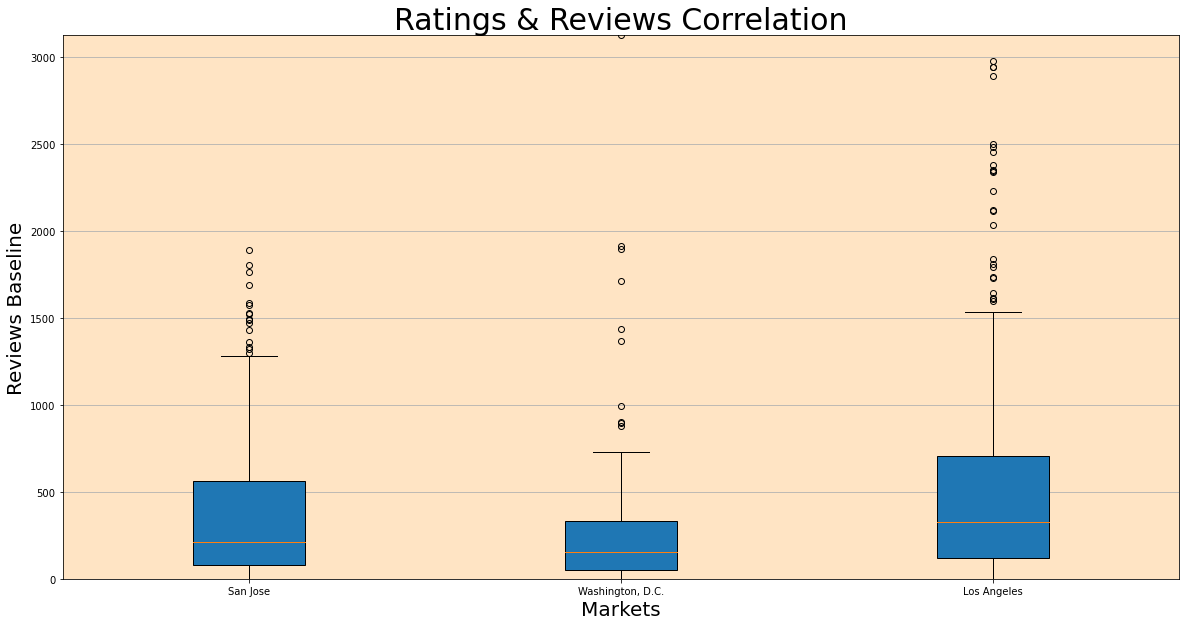

In [7]:
rating_vs_review(indian_sj, indian_dc, indian_la)

### High-End Existing Indian Restaurant Averages

We used data analysis and visualization techniques to determine the "averages" of existing high-end Indian restaurants in each market. 

Our assumptions are that if the average existing high-end Indian restaurant has more reviews (just as popular, as much, if not more demand) and ratings (consumers appreciative of quality and provide feedback) than the Baseline, then those are healthy, less-risky markets to enter. 

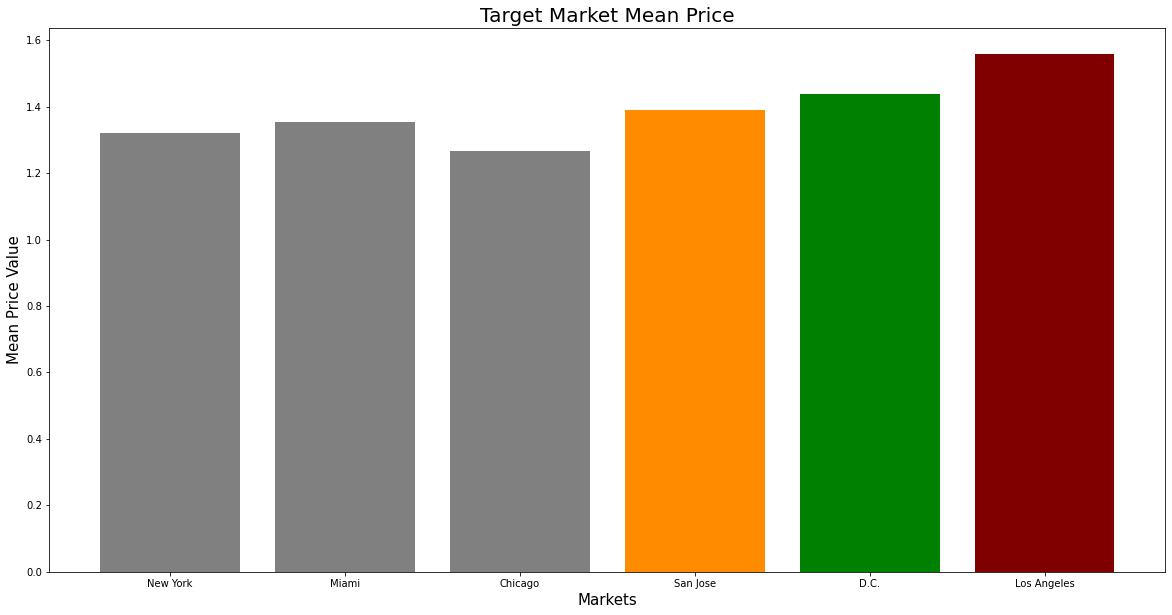

In [8]:
target_mean_price(indian_sj, indian_dc, indian_la, indian_ny, indian_chi, indian_mia)

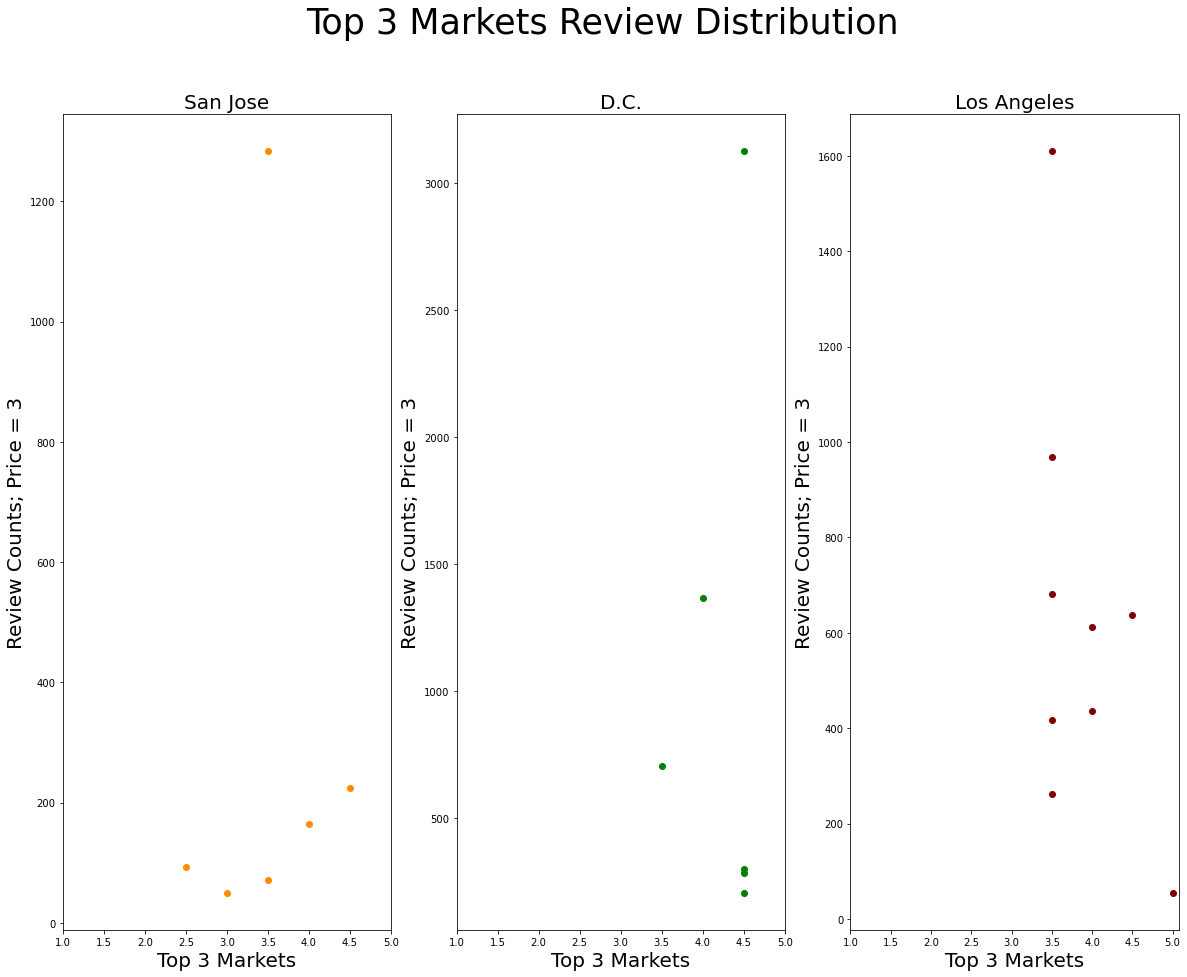

In [9]:
top_3_market_reviews(indian_sj, indian_dc, indian_la)

### Comparables Analysis

Comparing the Baselines to the "Averages" of existing Higher-End Indian restaurants in the area, we determined that Washington D.C. and Los Angeles are ideal markets to open a high-end Indian Restaurant, based on success probability and lower-risk profile.

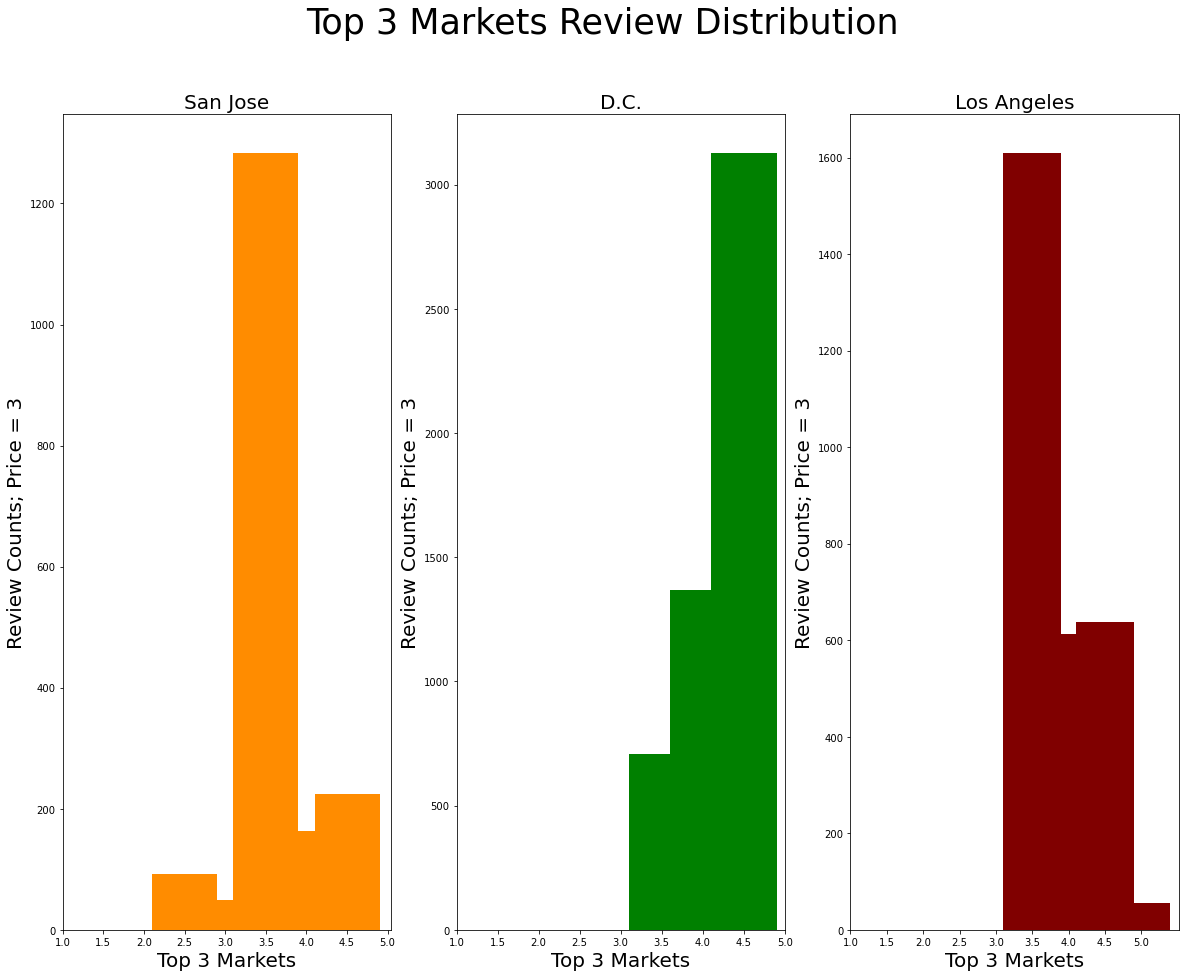

In [10]:
top_3_market_ratings(indian_sj, indian_dc, indian_la)

## Conclusions

This analysis leads to a solid business idea recommendation in specific markets:

- **Opening a high-end Indian Restaurant** Given the sample sizes of the respective available data, the restaurant category offers enough data (> 100 businesses & "price level" metrics) to make the analysis effective.
- **Open in the Washington D.C and Los Angeles, CA markets** There is a higher concentration of existing high-end Indian restaurants (defined as "price level of 3+") in these markets, signifying demand and less-risk, and the ratings and reviews are equal to, if not better than, the baseline for the average Indian restaurant in their respective markets, signifying consumer appreciation and less-risk/stability.

### Next Steps

Further analyses could yield additional insights to further improve our business process methods and our data analysis results:

- **Better prediction of business demand.** This modeling could use already available data, such as Census demographics data and Consumer Surveys, to better determine the demand for the particular offering.
- **Model need for business success indicators.** This modeling use other business-financials-health relevant data to incorporate into our captured businesses to determine further correlations and better predictive outcomes